In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


file_paths = glob.glob("vehicle_count_log_*.txt")
plt.figure(figsize=(10, 6))

for file_path in file_paths:
    df = pd.read_csv(file_path, header=None, names=["Time", "Vehicle_Count"])
    
    plt.plot(df["Time"], df["Vehicle_Count"], linestyle="-", label=file_path)

plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Count Over Time")
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: keyword argument repeated: label (976392163.py, line 14)

<Figure size 1000x600 with 0 Axes>

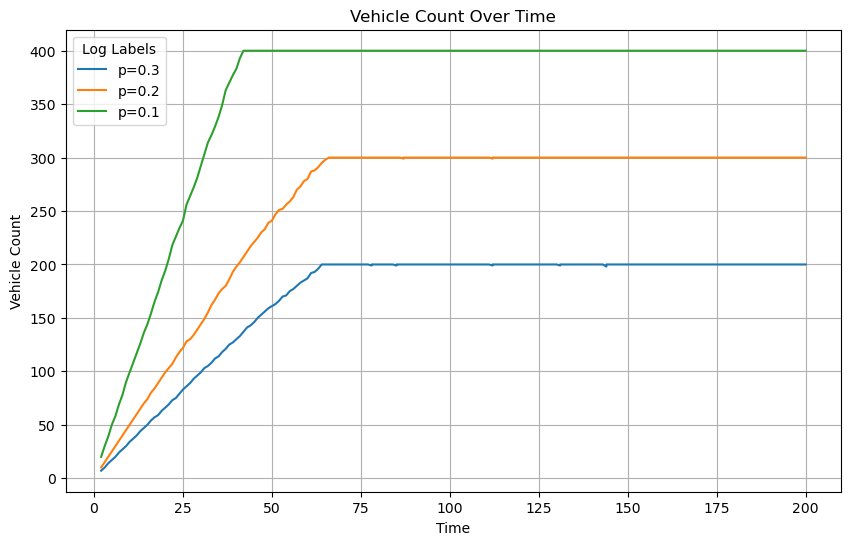

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import random

labels = ['p=0.3', 'p=0.2', 'p=0.1']

file_paths = glob.glob("vehicle_count_log_*.txt")

plt.figure(figsize=(10, 6))

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, header=None, names=["Time", "Vehicle_Count"])
    
    label = labels[i % len(labels)]
    
    plt.plot(df["Time"], df["Vehicle_Count"], linestyle="-", label=label)

plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Count Over Time")
plt.legend(title="Log Labels") 
plt.grid(True)
plt.show()


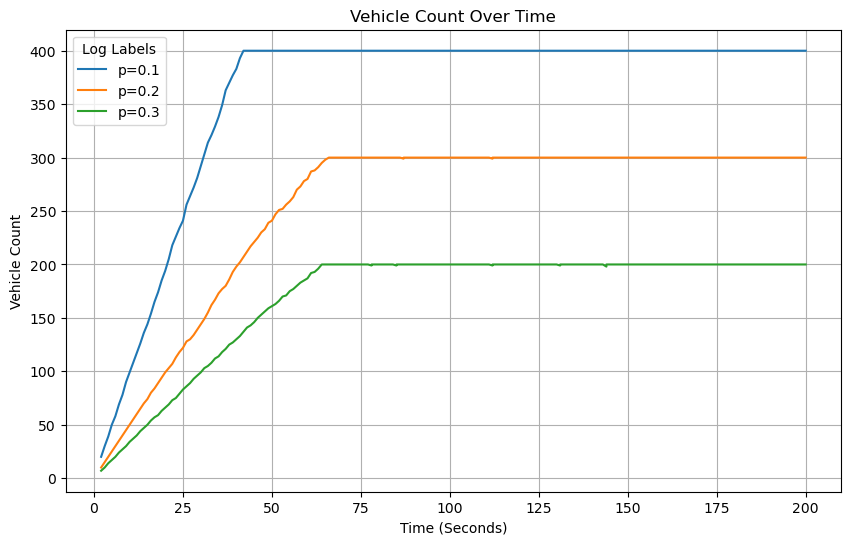

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['p=0.1', 'p=0.2', 'p=0.3']

file_paths = ["vehicle_count_log_3.txt", "vehicle_count_log_2.txt", "vehicle_count_log_1.txt"]

plt.figure(figsize=(10, 6))

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, header=None, names=["Time", "Vehicle_Count"])
    
    label = labels[i]
    plt.plot(df["Time"], df["Vehicle_Count"], linestyle="-", label=label)

plt.xlabel("Time (Seconds)")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Count Over Time")
plt.legend(title="Log Labels")
plt.grid(True)
plt.show()


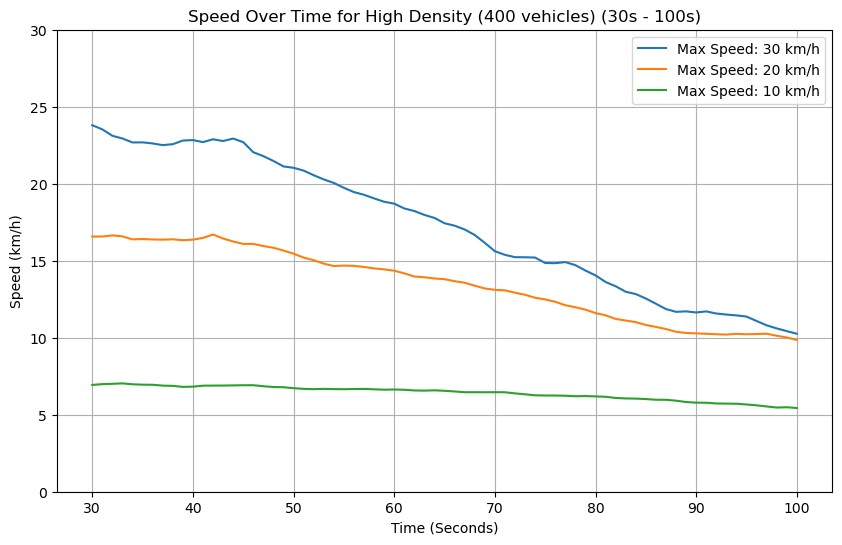

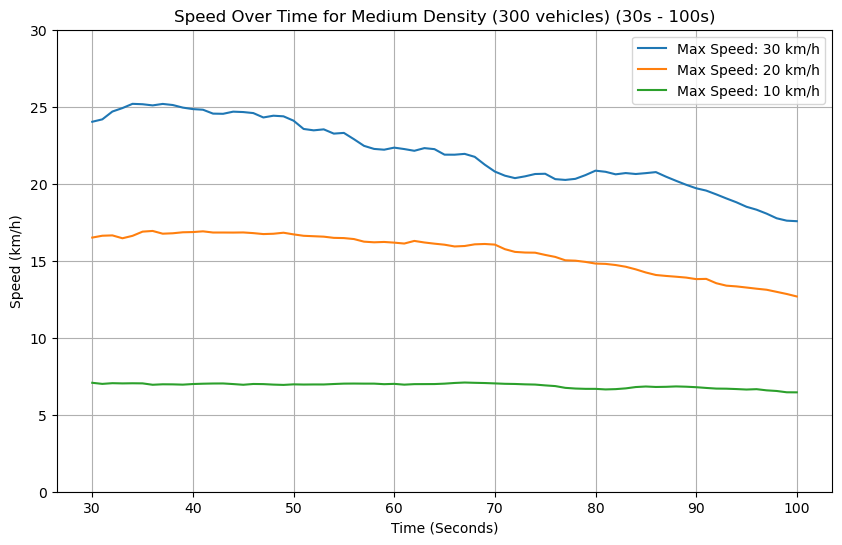

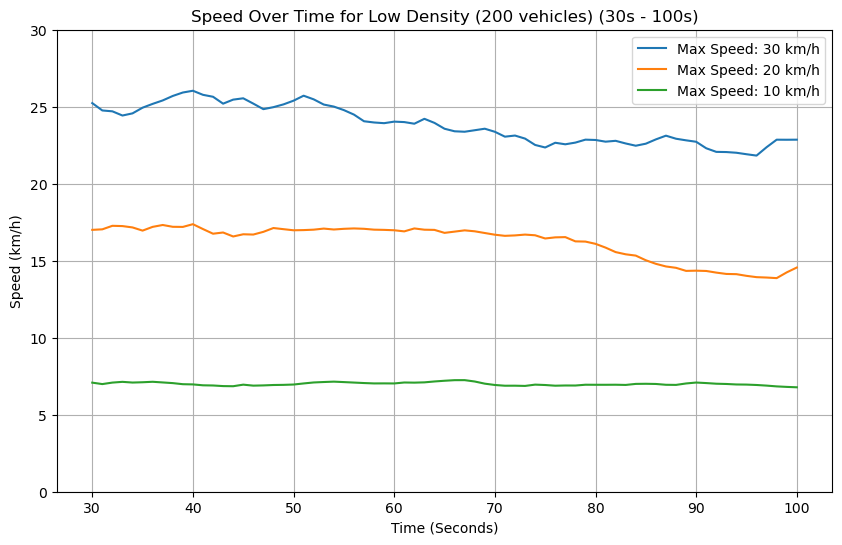

In [15]:
import matplotlib.pyplot as plt
import numpy as np

file_info = {
    "HHavgSpeed.txt": ("High Density (400 vehicles)", "30 km/h"),
    "HMavgSpeed.txt": ("High Density (400 vehicles)", "20 km/h"),
    "HLavgSpeed.txt": ("High Density (400 vehicles)", "10 km/h"),
    "MHavgSpeed.txt": ("Medium Density (300 vehicles)", "30 km/h"),
    "MMavgSpeed.txt": ("Medium Density (300 vehicles)", "20 km/h"),
    "MLavgSpeed.txt": ("Medium Density (300 vehicles)", "10 km/h"),
    "LHavgSpeed.txt": ("Low Density (200 vehicles)", "30 km/h"),
    "LMavgSpeed.txt": ("Low Density (200 vehicles)", "20 km/h"),
    "LLavgSpeed.txt": ("Low Density (200 vehicles)", "10 km/h")
}

density_data = {"High Density (400 vehicles)": [], "Medium Density (300 vehicles)": [], "Low Density (200 vehicles)": []}

for file, (density_label, speed_label) in file_info.items():
    try:
        data = np.loadtxt(f'speed/{file}', delimiter=",")
        time = data[:, 0]
        speed = data[:, 1]

        mask = (time >= 30) & (time <= 100)
        filtered_time = time[mask]
        filtered_speed = speed[mask]

        density_data[density_label].append((filtered_time, filtered_speed, speed_label))

    except Exception as e:
        print(f"Error reading file {file}: {e}")

for density, data_list in density_data.items():
    plt.figure(figsize=(10, 6))

    for time, speed, speed_label in data_list:
        plt.plot(time, speed, label=f"Max Speed: {speed_label}")

    plt.xlabel("Time (Seconds)")
    plt.ylabel("Speed (km/h)")
    plt.ylim(0, 30)
    plt.title(f"Speed Over Time for {density} (30s - 100s)")
    plt.legend()
    plt.grid(True)
    plt.show()
